##Goals
The data analyzed in this project includes approximately 17,000 games on the Appstore. The goals of this project is:
- Get familiar with the data
- Clean the data for analysis
- Develop some questions on analysis
- Analyze the data to answer these questions

##Data
The data for this project was downloaded from Kaggle:

https://www.kaggle.com/datasets/tristan581/17k-apple-app-store-strategy-games

Information regarding the features for the data are located in the `Column` section on the website.

Some code inspiration for this analysis was sourced from [this noteboook](https://www.kaggle.com/code/hakanyuzbasioglu/eda-mobile-games).



### Loading and checking the data
First, the relevant libraries are imported into the notebook. The pandas library is used to import data from `appstore_games.csv` and preview the first five rows of the DataFrame.

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [76]:
appstore_games = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Databases/appstore_games.csv')
pd.set_option('display.max_columns', None)
appstore_games.head(10)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",Robert Farnum,4+,NaN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,64333824.0,Games,"Games, Strategy, Board",3/08/2008,3/10/2018
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",Jean-Francois Pautex,4+,FR,2657280.0,Games,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,BesqWare,4+,EN,1466515.0,Games,"Games, Casual, Strategy",1/08/2008,1/08/2008


### Data information
Some significant insights that we can see from the data are:
- There are 18 columns & 17,007 rows in this dataset
- There are null values in several columns
- The `ID` column can be dropped since it is not necessary for analysis
- We can also drop the `Primary Genre` column  as well as the "Games" part in the `Genres` column since all of the rows are games already
- The `Size` column currently measures games in bytes. We will convert it to megabytes since this is the industry norm
- For analysis, it is necessary to convert the `Original Release Date` and `Current Version Release Date` columns to the date-time format

In [77]:
appstore_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

In [78]:
appstore_games.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [79]:
appstore_games.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

### Cleaning the data
Subsequently, these steps will be taken to clean the dataset:
- The row with null value in the `Size` column will be dropped, since games without Size information are vague
- Null values in the `Price` column will be filled with `0` and we assume games with such values are free
- As mentioned before, we will drop the `ID` and ` Primary Genre` column. We will also clean the "Games" part from the `Genres` column
- The `Original Release Date` column and `Current Version Release Date` column will be converted to the date-time format
- Values in the `Size` column will be changed to `float` type and divided by `1,000,000` to convert to megabytes values

In [80]:
appstore_games = appstore_games.dropna(subset=['Size'])
appstore_games['Price'].fillna('0.0', inplace=True)
appstore_games['Price'] = appstore_games['Price'].astype(float)

In [81]:
appstore_games = appstore_games.drop(['ID', 'Primary Genre'], axis = 1)
appstore_games['Original Release Date'] = pd.to_datetime(appstore_games['Original Release Date'])
appstore_games['Current Version Release Date'] = pd.to_datetime(appstore_games['Current Version Release Date'])

appstore_games['Genres'] = appstore_games['Genres'].replace('Games, ', '', regex=True) #remove "Games" from genre

appstore_games['Size'] = appstore_games['Size'].astype(float) / 1000000 #convert "Size" to  MB and change type to float

In [82]:
appstore_games.head() #Checking the dataset again

,URL,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.853568,"Strategy, Puzzle",2008-11-07,2017-05-30
1,https://apps.apple.com/us/app/reversi/id284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12.328960,"Strategy, Board",2008-11-07,2018-05-17
2,https://apps.apple.com/us/app/morocco/id284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,0.674816,"Board, Strategy",2008-11-07,2017-05-09
3,https://apps.apple.com/us/app/sudoku-free/id28...,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21.552128,"Strategy, Puzzle",2008-07-23,2017-05-30
4,https://apps.apple.com/us/app/senet-deluxe/id2...,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34.689024,"Strategy, Board, Education",2008-07-18,2018-07-22


## Exploratory Data Analysis
After some data cleaning and tidying, the DataFrame is ready for EDA. We will perform some unvariate along with bivariate analysis. For the latter part, the following independent variables will be focused on in the analysis:
- `Average User Rating`
- `User Rating Count`

We will see how these variables associate with the following variables:
- `Price`
- `Developer`
- `Age rating`
- `Size`
- `Original Release Date`
- `Current Version Release Date`

The hope is that through summary statistics and visualizations the following questions can be answered:
- Does the price, age rating, the release date affect the overall user rating as well as the number of ratings?
- Which are the best developers in terms of user rating count?


Along the way, these questions may be refined and more questions may pop up.

### Unvariate Analysis

#### Average user rating distribution
We can see that the majority of game ratings are positive, with the majority being 4.5 stars or higher

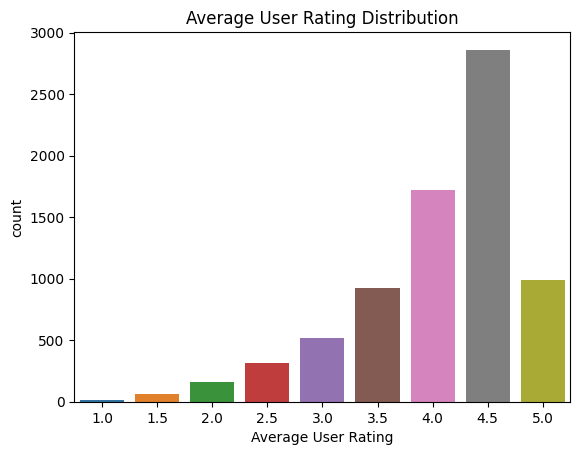

In [84]:
sns.countplot(data=appstore_games, x=appstore_games['Average User Rating'])
plt.title('Average User Rating Distribution')
plt.show()

#### Price distribution
Most of the games are free, while the majority of paid games are priced under $25

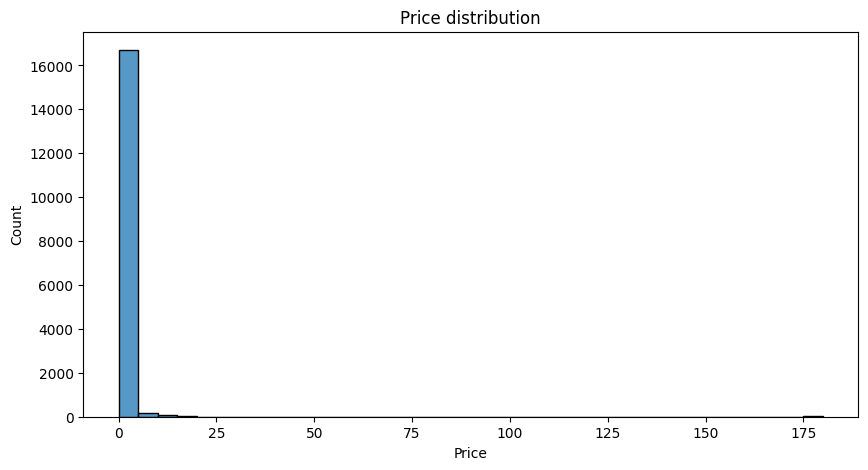

In [100]:
plt.figure(figsize=(10,5))
sns.histplot(appstore_games['Price'], binwidth=5)
plt.title('Price distribution')
plt.show()

Here we can see that around 83.7% of the games in the dataset is free to download

In [86]:
appstore_games['Price'].value_counts(normalize=True)

0.00      0.837058
0.99      0.063389
1.99      0.030283
2.99      0.027696
4.99      0.013936
3.99      0.009585
9.99      0.005175
11.99     0.003469
5.99      0.002470
6.99      0.001882
179.99    0.001764
7.99      0.001000
8.99      0.000764
19.99     0.000529
14.99     0.000235
12.99     0.000176
16.99     0.000118
29.99     0.000118
139.99    0.000059
99.99     0.000059
37.99     0.000059
36.99     0.000059
18.99     0.000059
59.99     0.000059
Name: Price, dtype: float64

#### Number of games by Age Rating
We can see that most of the games are rated 4+

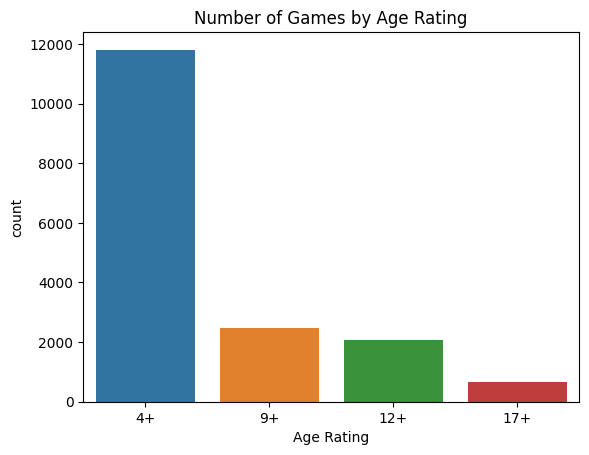

In [87]:
sns.countplot(x=appstore_games['Age Rating'])
plt.title('Number of Games by Age Rating')
plt.show()

#### Number of games by developers
Here we see top 20 developers regarding the number of games in the dataset they have. Top 3 of the list are `Tapps Tecnologia da Informao`, `Vikash Patel` and `Netsummit Marketing`

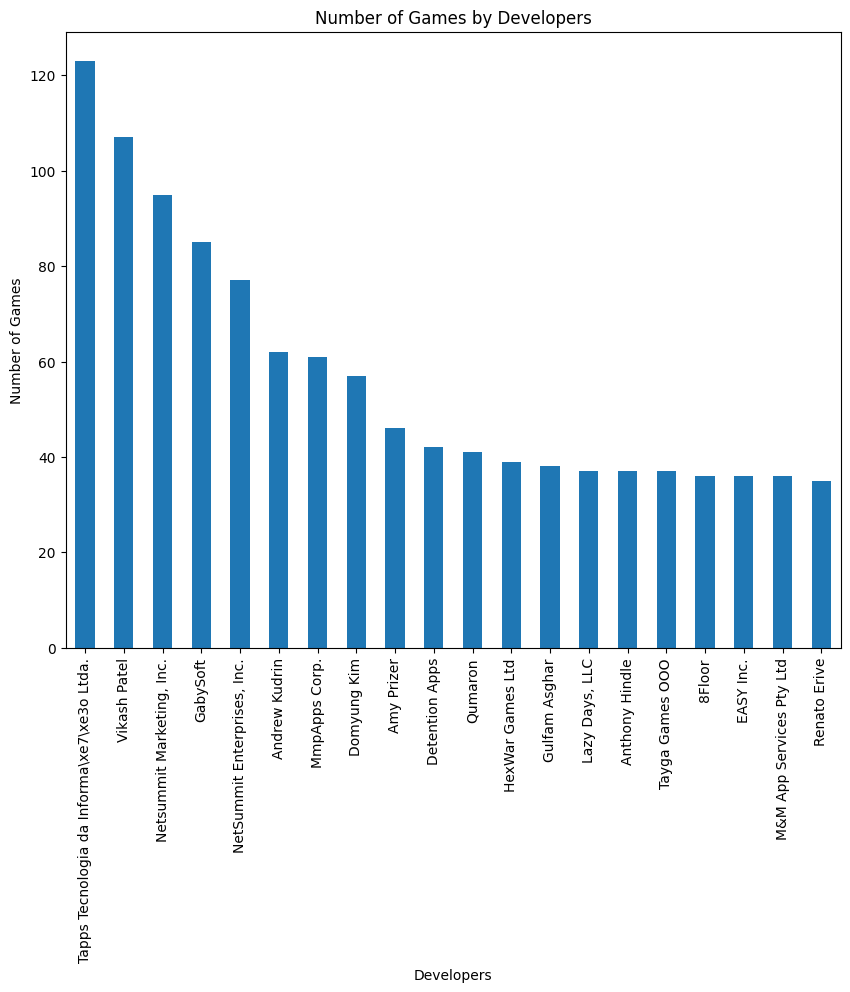

In [88]:
plt.figure(figsize=(10,8))
appstore_games['Developer'].value_counts()[0:20].plot(kind='bar')
plt.xlabel('Developers')
plt.ylabel('Number of Games')
plt.title('Number of Games by Developers')
plt.show()

#### Language distribution
73.6% of games have English only, this is understandable since it is Appstore US

In [101]:
appstore_games['Languages'].value_counts(normalize=True).reset_index()

,index,Languages
0,EN,0.735631
1,"EN, ZH",0.020890
2,"CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH...",0.016346
3,"EN, ZH, ZH",0.014635
4,"EN, DE",0.008675
...,...,...
985,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NO, PL, PT...",0.000059
986,"EN, FR, IT, JA, KO, PT, RU, ES, TR",0.000059
987,"DA, NL, EN, FR, DE, IT, NB, PL, PT, ZH, ES, SV...",0.000059
988,"EN, PT, ZH",0.000059


#### Game size distribution
Most of the games are under 500MB, which are made to suit the mobile platform

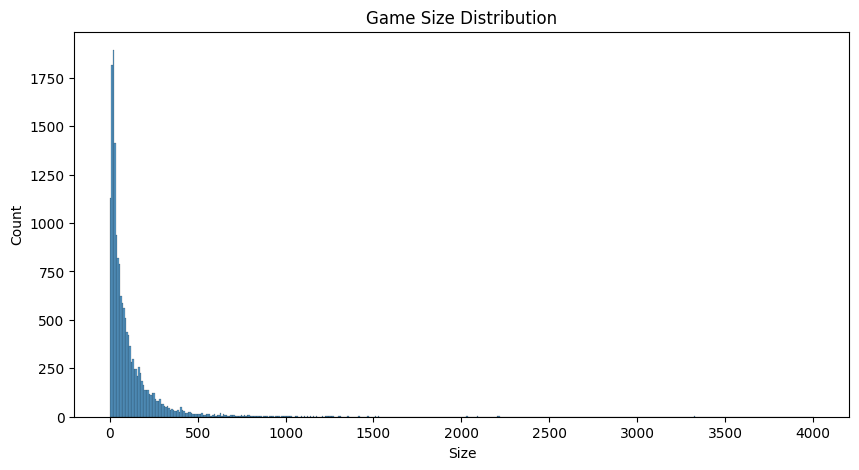

In [90]:
plt.figure(figsize=(10,5))
sns.histplot(appstore_games['Size'])
plt.title('Game Size Distribution')
plt.show()

### Bivariate Analysis

#### Average user rating for free games and paid games
Here we can see that the pricing of the game does not affect how it is rated, since the distribution of these two types are quite similar

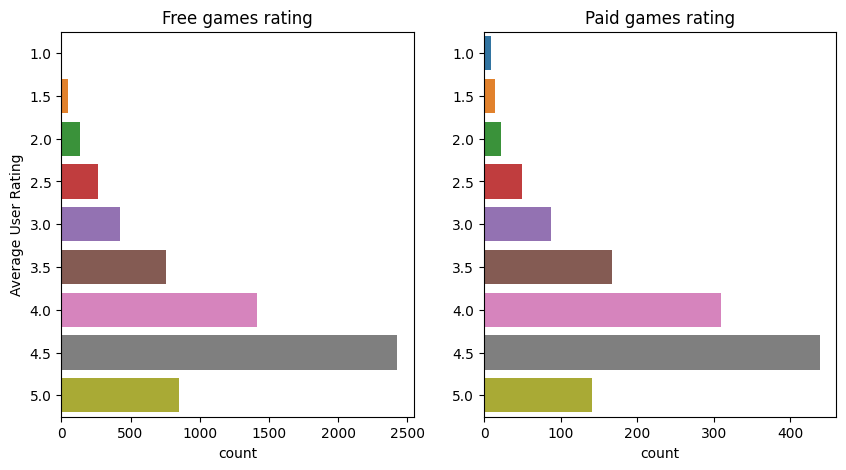

In [91]:
free_games = appstore_games[appstore_games['Price'] == 0]
paid_games = appstore_games[appstore_games['Price'] != 0]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=free_games, y=free_games['Average User Rating'])
plt.title('Free games rating')
plt.subplot(1, 2, 2)
sns.countplot(data=paid_games, y=paid_games['Average User Rating'])
plt.ylabel('')
plt.title('Paid games rating')
plt.show()

#### Average user rating among Age rating
The average rating distribution among various age ratings is measured using a similar analysis. Likewise, it appears that the games' ratings are unaffected by their age restriction

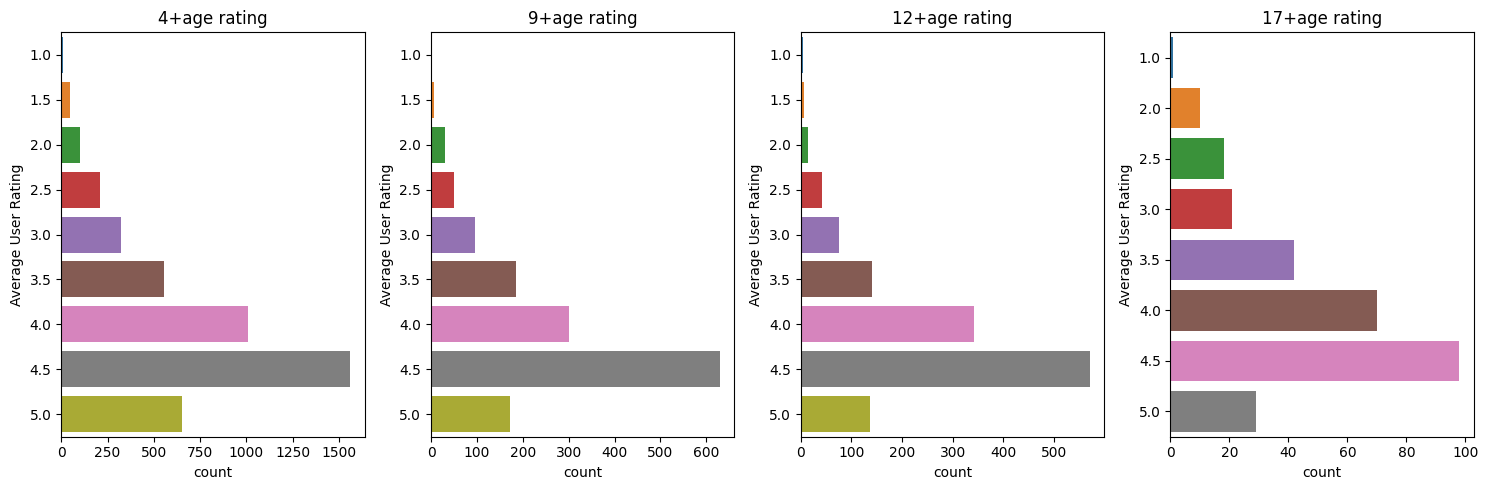

In [92]:
plt.figure(figsize=(15,5))
plot = 0
for i in appstore_games['Age Rating'].unique():
  plot += 1
  plt.subplot(1, 4, plot)
  data = appstore_games[appstore_games['Age Rating'] == i]
  sns.countplot(data=data, y=data['Average User Rating'])
  plt.title(str(i) + 'age rating')
plt.tight_layout()
plt.show()

#### Top developer in terms of rating count
`Supercell` is the game developer with the highest user rating count, with `Tencent Mobile` and `Electronic Arts` as its nearest competitors. Besides that, since players only give ratings for games they have played, we can assume that `Supercell` has the most downloads in the Appstore

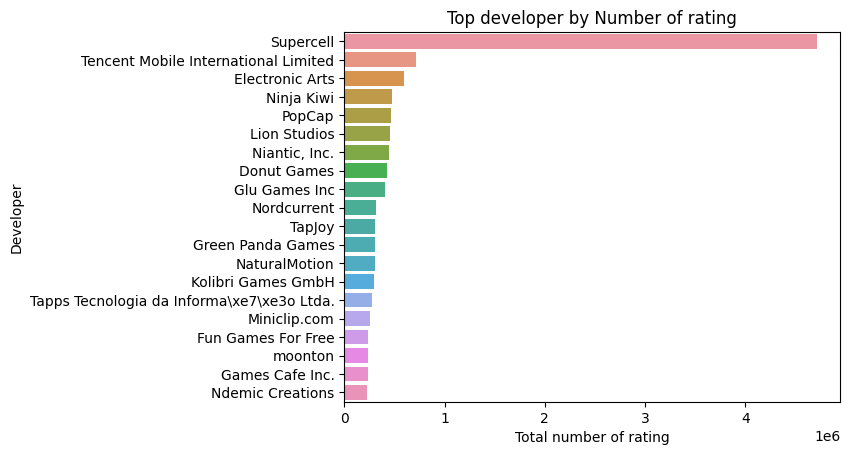

In [93]:
data = appstore_games.groupby(['Developer'])['User Rating Count'].sum().sort_values(ascending=False).reset_index()
data.columns = ['Developer', 'Total number of rating']

sns.barplot(x='Total number of rating', y='Developer', data=data.head(20))
plt.title('Top developer by Number of rating')
plt.show()

#### Top games in terms of rating count
Using similar analysis, we can see that `Clash of Clans`, `Clash Royale` and `PUBG Mobile` have the highest number of ratings

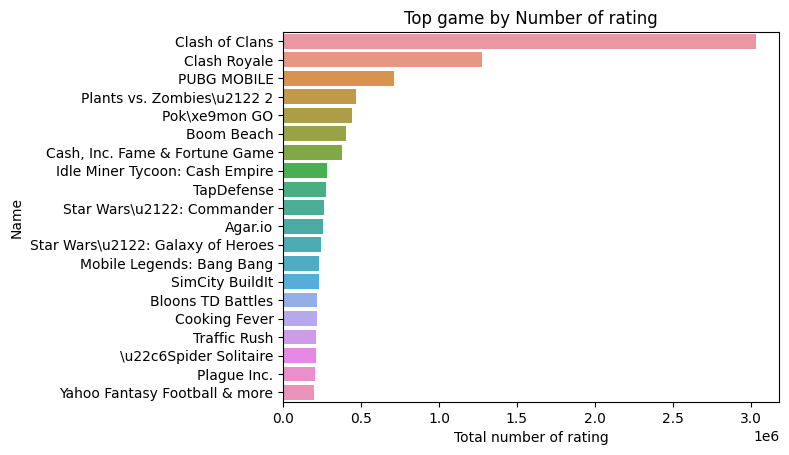

In [94]:
data = appstore_games.groupby(['Name'])['User Rating Count'].sum().sort_values(ascending=False).reset_index()
data.columns = ['Name', 'Total number of rating']

sns.barplot(x='Total number of rating', y='Name', data=data.head(20))
plt.title('Top game by Number of rating')
plt.show()

#### Trend in game size
We can observe that as new technology is adopted in the industry, games are progressively growing in size

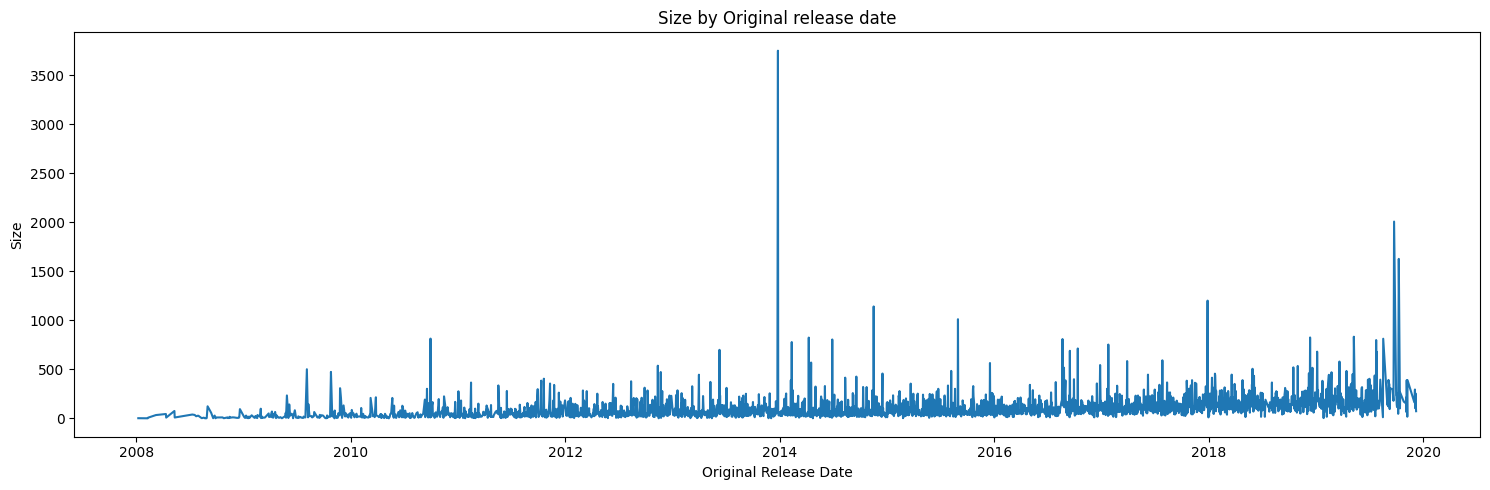

In [103]:
size_by_date = appstore_games.groupby(['Original Release Date'])['Size'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(data=size_by_date, x='Original Release Date', y='Size')
plt.title('Size by Original release date')
plt.tight_layout()
plt.show()

#### Average user rating by update date
We can see that games that are updated more recently get higher average rating


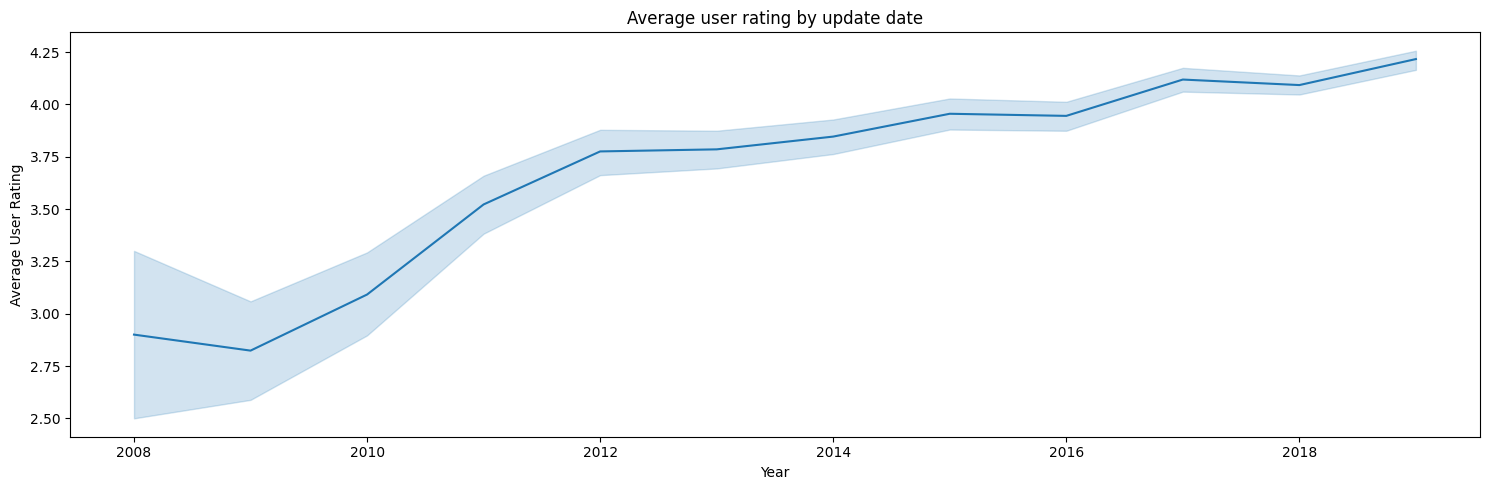

In [104]:
rating_by_update = appstore_games.groupby(['Current Version Release Date'])['Average User Rating'].mean().reset_index()
rating_by_update['Year'] = rating_by_update['Current Version Release Date'].dt.year
rating_by_update.head()

plt.figure(figsize=(15,5))
sns.lineplot(data=rating_by_update, x='Year', y='Average User Rating')
plt.title('Average user rating by update date')
plt.tight_layout()
plt.show()

## Conclusions
Some insights we can draw from the analysis are:
- The majority of games have high user ratings, which are independent of price or age restrictions
- Around 83.7% of games on the Appstore are free, and most of these games are rated 4+
- `Tapps Technologia and Informao` has the most games in the dataset, but `Supercell` is the one having the highest rating count
- `Clash of Clans` has the highest rating count for games
- Around 73.6% of games only have English, which is quite understandable for the US market
- The majority of games are under 500MB, but as time goes on, their sizes increase
- Games with more recent updates get better ratings from users

These information are extremely helpful for developers or publishers who are planning to launch a game on the Appstore US. Thanks for reading!